In [129]:
import pandas as pd
import numpy as np

df = pd.read_csv("wc_day6_1_sample.csv", encoding="ISO-8859-1", names=["ClientID", "Date","Time","URL", "ResponseCode","Size"])
                 #header=-1) 
                 #names=['index', 'date', 'time', 'file', 'status', 'duration'])
df['Size'] = df['Size'].replace('-', np.nan)
df['Size'] = df['Size'].astype(float)

In [130]:
df.head()

,ClientID,Date,Time,URL,ResponseCode,Size
0,1044,30/Apr/1998,22:46:12,/images/11104.gif,200,508.0
1,10871,01/May/1998,12:10:53,/images/ligne.gif,200,169.0
2,11012,01/May/1998,12:17:30,/english/individuals/player111503.htm,200,7027.0
3,11435,01/May/1998,13:15:13,/french/frntpage.htm,304,0.0
4,12128,01/May/1998,13:30:21,/english/images/nav_sitemap_off.gif,304,NaN


#### How many requests that were sent on '30/Apr/1998' and had HTTP return code 404?

In [131]:
df1 = df[df['ResponseCode'] == '404']
df1.groupby('Date').size()

Date
01/May/1998    198
30/Apr/1998     17
dtype: int64

#### Generate a plot of the number of distinct users of the site every hour on 01/May/1998 using bar chart.

In [132]:
d_df = df[df['Date'] == '01/May/1998']
to_dt = d_df.apply(lambda x: ' '.join([x['Date'], x['Time']]), axis=1)
d_df.loc[:, ('Datetime')] = pd.to_datetime(to_dt)

E:\anaconda\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
E:\anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [133]:
d_df.head()

,ClientID,Date,Time,URL,ResponseCode,Size,Datetime
1,10871,01/May/1998,12:10:53,/images/ligne.gif,200,169.0,1998-05-01 12:10:53
2,11012,01/May/1998,12:17:30,/english/individuals/player111503.htm,200,7027.0,1998-05-01 12:17:30
3,11435,01/May/1998,13:15:13,/french/frntpage.htm,304,0.0,1998-05-01 13:15:13
4,12128,01/May/1998,13:30:21,/english/images/nav_sitemap_off.gif,304,NaN,1998-05-01 13:30:21
5,13649,01/May/1998,14:55:01,/images/hm_anime_e.gif,200,15609.0,1998-05-01 14:55:01


In [134]:
dhg = d_df.groupby(lambda x: d_df['Datetime'][x].hour)

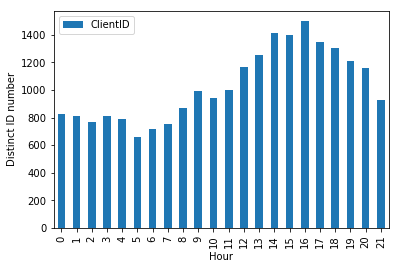

In [135]:
import matplotlib as plt
% matplotlib inline

ax = dhg.agg({"ClientID": 'nunique'}).plot(kind='bar')
ax.legend(loc='upper left')
ax.set_xlabel("Hour")
ax.set_ylabel("Distinct ID number")

#### Generate a line plot of the number of distinct users vs size of traffic of the site every hour on 01/May/1998, is there any correlation? (hint: use "hour_grouped['ClientID'].nunique()" to get the number of distinct users)

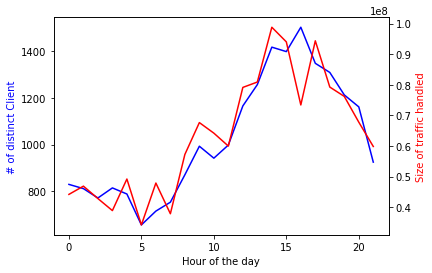

In [136]:
fig, ax1 = plt.pyplot.subplots()
ax2 = ax1.twinx()
x = dhg.size().index
ax1.plot(x, dhg.agg({"ClientID": 'nunique'}), "b-")
ax2.plot(x, dhg['Size'].sum(), "r-")
ax1.set_xlabel('Hour of the day')
ax1.set_ylabel('# of distinct Client', color='b')
ax2.set_ylabel('Size of traffic handled', color='r')

#### We wish to see if there is any correlation between client-ids and hours of the day at which they visit the website. Get 100 client ids from the dataset and generate a scatter plot that shows the hours of the day these clients sent requests. Hint: df.plot(kind='scatter', x='a', y='b'); and df['Column'].unique()

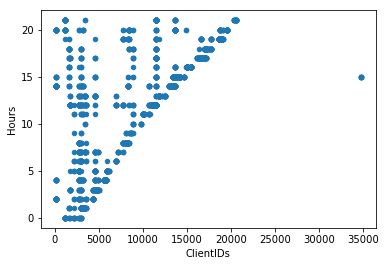

In [104]:
c = d_df['ClientID'].unique()

import random
r = set()
for i in range(100):
    x = random.randrange(0, len(c)-1)
    while x in r:
        x = random.randrange(0, len(c)-1)
    r.add(x)
    
xx = list(map(lambda x: x[1], list(zip(r, c))))

cdf = d_df[d_df['ClientID'].isin(xx)]

ndf = pd.DataFrame({'a':cdf['ClientID'], "b": cdf['Time'].astype(str).apply(lambda x: int(x[:2]))})

ax = ndf.plot(kind='scatter', x='a', y='b')
ax.set_xlabel('IDs')
ax.set_ylabel('Hours')

#### The log file used in the lab was from one day of the WorldCup. Lets apply our analysis to Jul/24 and Jul/25 in the log(wc_day91_1.log.tar.bz2). Repeat exercises 3 and 4 with it. How similar or different are the results? Hint: You can use UNIX command line tools from Lab 1 to first get a csv file and then load it into Pandas.

In [141]:
df = pd.read_csv("1.csv", names=["ClientID", "Date","Time","URL", "ResponseCode", "Size"])
df['Size'] = df['Size'].replace('-', np.nan)
df['Size'] = df['Size'].astype(float)
df.head()

,ClientID,Date,Time,URL,ResponseCode,Size
0,2743832,24-Jul-98,22:00:01,"GET,/english/history/body.html,HTTP/1.1",200,2909.0
1,2572248,24-Jul-98,22:00:01,"GET,/,HTTP/1.0",200,4930.0
2,31798,24-Jul-98,22:00:02,"GET,/french/competition/maincomp.htm,HTTP/1.0",200,12970.0
3,1848501,24-Jul-98,22:00:02,"GET,/,HTTP/1.0",200,4930.0
4,248,24-Jul-98,22:00:03,"GET,/images/home_intro.anim.gif,HTTP/1.0",200,60349.0


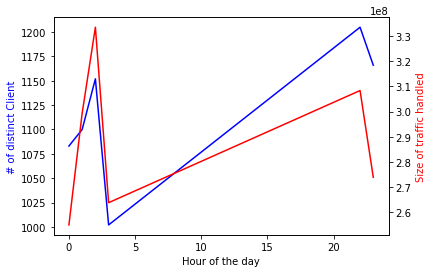

In [142]:
d_df = df[df[Date] == '24-Jul-98']
#d_df = df[df[Date] == '25-Jul-98']
to_dt = d_df.apply(lambda x: ' '.join([x['Date'], x['Time']]), axis=1)
df.loc[:, ('Datetime')] = pd.to_datetime(to_dt)
dhg = d_df.groupby(lambda x: df['Datetime'][x].hour)
fig, ax1 = plt.pyplot.subplots()
ax2 = ax1.twinx()
x = dhg.size().index
ax1.plot(x, dhg.agg({"ClientID": 'nunique'}), "b-")
ax2.plot(x, dhg['Size'].sum(), "r-")
ax1.set_xlabel('Hour of the day')
ax1.set_ylabel('# of distinct Client', color='b')
ax2.set_ylabel('Size of traffic handled', color='r')

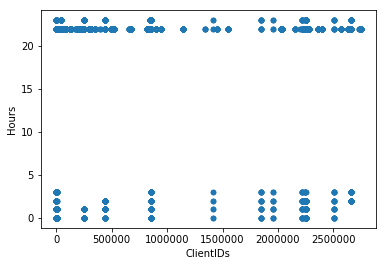

In [144]:
c = d_df['ClientID'].unique()
import random
r = set()
for i in range(100):
    x = random.randrange(0, len(c)-1)
    while x in r:
        x = random.randrange(0, len(c)-1)
    r.add(x)   
xx = list(map(lambda x: x[1], list(zip(r, c))))
cdf = d_df[d_df['ClientID'].isin(xx)]
ndf = pd.DataFrame({'a':cdf['ClientID'], "b": cdf['Time'].astype(str).apply(lambda x: int(x.split(":")[0]))})
ax = ndf.plot(kind='scatter', x='a', y='b')
ax.set_xlabel('ClientIDs')
ax.set_ylabel('Hours')